In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
import math

# Get the Data

In [38]:
maneuvers = pd.read_csv("maneuvers_T2.csv")
#maneuvers.head()

In [39]:
maneuvers.describe()

,t,x,y,z,dx,dy,dz,dv_st
count,2052.000000,2.052000e+03,2052.0,2.052000e+03,2.052000e+03,2.052000e+03,2.052000e+03,2.052000e+03
mean,3144.884951,-9.888428e-01,0.0,-1.121020e-03,3.212860e-13,-9.033485e-03,2.317252e-12,-4.743713e-13
std,1812.609190,4.085886e-12,0.0,1.688230e-10,9.022943e-13,5.924957e-11,1.307555e-11,1.580945e-12
min,7.648067,-9.888428e-01,0.0,-1.121020e-03,-2.490051e-12,-9.033485e-03,-3.280954e-11,-5.980907e-12
25%,1576.266509,-9.888428e-01,0.0,-1.121020e-03,-2.624006e-13,-9.033485e-03,-5.078938e-12,-1.479615e-12
50%,3144.884951,-9.888428e-01,0.0,-1.121020e-03,3.218526e-13,-9.033485e-03,1.998529e-12,-4.858244e-13
75%,4713.503393,-9.888428e-01,0.0,-1.121020e-03,8.987896e-13,-9.033485e-03,9.548209e-12,5.423324e-13
max,6282.121834,-9.888428e-01,0.0,-1.121020e-03,3.332073e-12,-9.033485e-03,3.821121e-11,5.329819e-12


Notice that dv_vel varies in the range -2e-7 to 1e-7, while dv_st varies in the range -7e-9 to 4e-9, so the MOST COSTLY maneuvers are much larger using CORRECTION_VEL method than using CORRECTION_ST !!

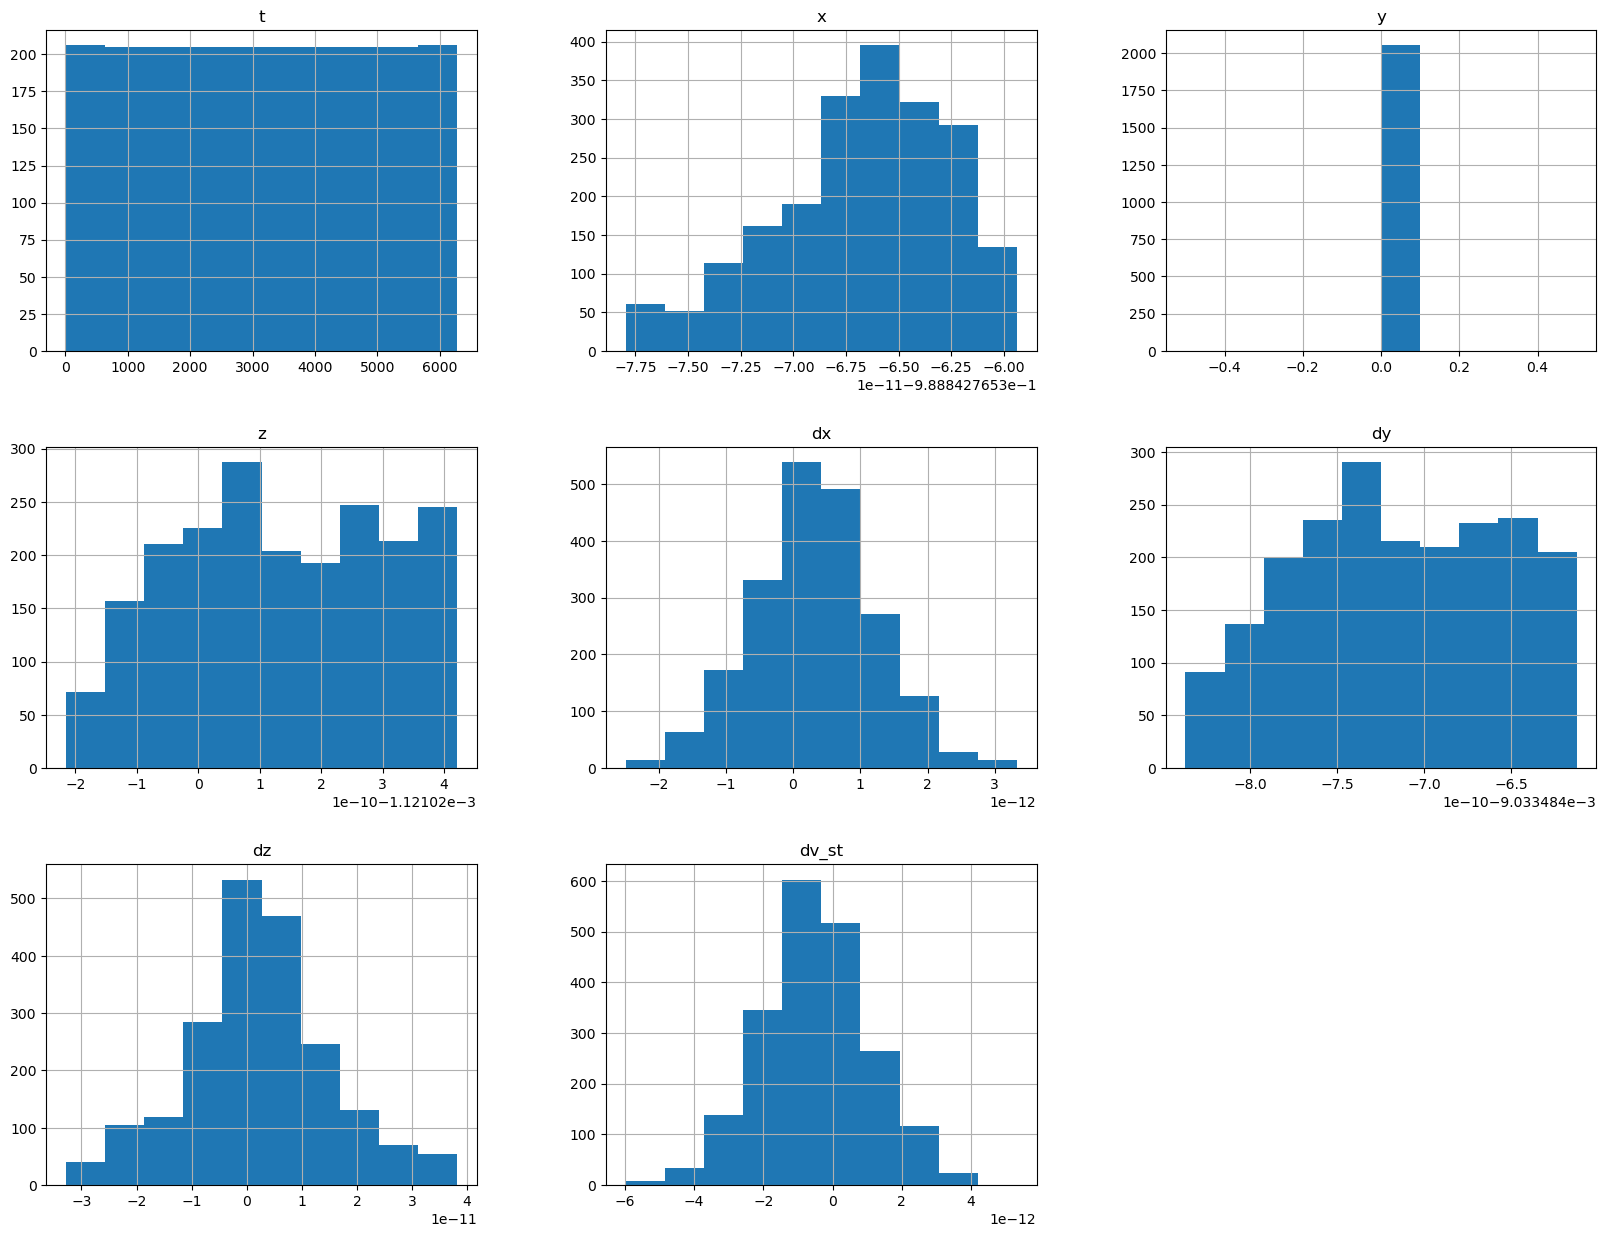

In [40]:
maneuvers.hist(figsize=(20,15))
plt.show()

Histograms of attributes (x,y,z,dx,dy,dz) are tail heavy. We may need to transform to polar coords, or use angle in p.o. as extra attribute.

## Visualizing Data

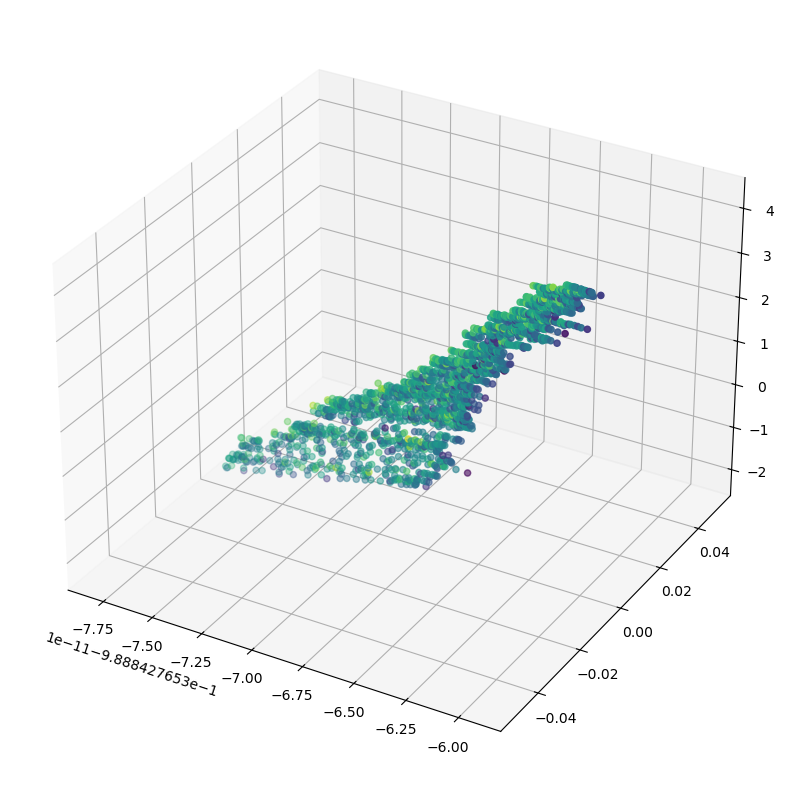

In [41]:
# Visualize shadowing orbit in position space, i.e. the points where correction
# maneuvers are performed.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(maneuvers['x'], maneuvers['y'], maneuvers['z'], c=maneuvers['dv_st'])
plt.show()

Try adding new attribute "angle" = angle in the periodic orbit, which is essentially time/period.

In [42]:
#maneuvers["angle"]=maneuvers["t"].apply(lambda x: math.fmod(x, 0.3059226605957322E+01))
maneuvers = maneuvers.drop(["t"], axis=1)
maneuvers = maneuvers.drop(["y"], axis=1)
corr_matrix = maneuvers.corr()
corr_matrix["dv_st"].sort_values(ascending=False)

dv_st    1.000000
dz       0.055563
dy       0.019172
z        0.017712
x       -0.054982
dx      -0.884458
Name: dv_st, dtype: float64

array([[<Axes: xlabel='x', ylabel='x'>, <Axes: xlabel='z', ylabel='x'>,
        <Axes: xlabel='dx', ylabel='x'>, <Axes: xlabel='dy', ylabel='x'>,
        <Axes: xlabel='dz', ylabel='x'>,
        <Axes: xlabel='dv_st', ylabel='x'>],
       [<Axes: xlabel='x', ylabel='z'>, <Axes: xlabel='z', ylabel='z'>,
        <Axes: xlabel='dx', ylabel='z'>, <Axes: xlabel='dy', ylabel='z'>,
        <Axes: xlabel='dz', ylabel='z'>,
        <Axes: xlabel='dv_st', ylabel='z'>],
       [<Axes: xlabel='x', ylabel='dx'>, <Axes: xlabel='z', ylabel='dx'>,
        <Axes: xlabel='dx', ylabel='dx'>,
        <Axes: xlabel='dy', ylabel='dx'>,
        <Axes: xlabel='dz', ylabel='dx'>,
        <Axes: xlabel='dv_st', ylabel='dx'>],
       [<Axes: xlabel='x', ylabel='dy'>, <Axes: xlabel='z', ylabel='dy'>,
        <Axes: xlabel='dx', ylabel='dy'>,
        <Axes: xlabel='dy', ylabel='dy'>,
        <Axes: xlabel='dz', ylabel='dy'>,
        <Axes: xlabel='dv_st', ylabel='dy'>],
       [<Axes: xlabel='x', ylabel='dz'>, <Ax

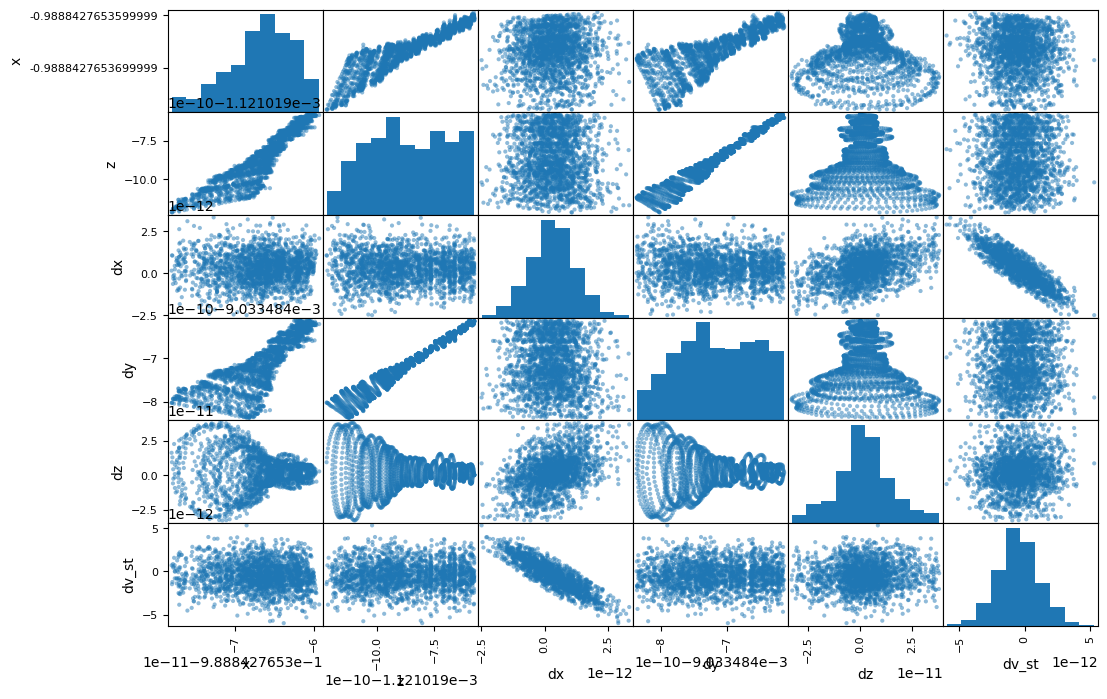

In [43]:
#attributes = ["angle", "x", "dx", "dv_st"]
attributes = ["x", "z", "dx", "dy", "dz", "dv_st"]
scatter_matrix(maneuvers[attributes], figsize=(12, 8))

dv_st is either positively or negatively correlated to state variables (x,y,z,dx,dy,dz) !!

Notice that angle and dv_st are not correlated, but they are nonlinearly related ("V" shape) !!

y, dx and dz are perfectly correlated!!!

# Prepare the Data for Machine Learning Algorithms

## Create a Train/Test Set

In [44]:
# Let's separate the predictors and the labels

# Drop dx and dz features, since they are almost proportional to y
#maneuvers_predictors = maneuvers.drop(["dx", "dz", "dv_st"], axis=1)

maneuvers_predictors = maneuvers.drop("dv_st", axis=1)
maneuvers_labels = maneuvers[["dv_st"]].copy()
maneuvers_predictors.head()
#maneuvers_labels.head()

,x,z,dx,dy,dz
0,-0.988843,-0.001121,3.131055e-13,-0.009033,-3.145664e-14
1,-0.988843,-0.001121,2.397858e-13,-0.009033,1.308130e-14
2,-0.988843,-0.001121,-8.427106e-13,-0.009033,2.185633e-13
3,-0.988843,-0.001121,-6.790518e-13,-0.009033,4.057815e-13
4,-0.988843,-0.001121,5.935964e-13,-0.009033,3.502020e-13


## Create Train/Test/Validation Sets

In [45]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
maneuvers_predictors, maneuvers_labels, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
X_train.head()

(1230, 5)
(411, 5)
(411, 5)


,x,z,dx,dy,dz
395,-0.988843,-0.001121,8.606767e-14,-0.009033,3.337497e-12
1418,-0.988843,-0.001121,1.631987e-12,-0.009033,1.927912e-11
862,-0.988843,-0.001121,9.189312e-13,-0.009033,-4.633804e-12
291,-0.988843,-0.001121,7.572178e-13,-0.009033,-2.284924e-12
835,-0.988843,-0.001121,9.269373e-13,-0.009033,9.770142e-12


In [46]:
# Scale all the features. This transforms data type from dataframe to numpy array.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]

array([[0.7314682 , 0.81984647, 0.45692927, 0.86184379, 0.51064653],
       [0.44004059, 0.3774294 , 0.73514133, 0.41447901, 0.73717322],
       [0.61186981, 0.60714446, 0.6068159 , 0.63965239, 0.39737625],
       [0.84335327, 0.86714127, 0.57771309, 0.8632841 , 0.43075326],
       [0.71178436, 0.64119181, 0.60825673, 0.61224552, 0.60205287]])

In [47]:
# Try PCA of data
from sklearn.decomposition import PCA
pca_pred = PCA(n_components=2, whiten=True)   # PCA of predictors
principalComponents_pred = pca_pred.fit_transform(X_train_scaled)
print('Explained variability per principal component: {}'.format(pca_pred.explained_variance_ratio_))

# X_train_scaled = pca_pred.transform(X_train_scaled)
# X_valid_scaled = pca_pred.transform(X_valid_scaled)
# X_test_scaled = pca_pred.transform(X_test_scaled)
# X_train_scaled[:5]

Explained variability per principal component: [0.70544044 0.17452642]


In [48]:
# Scale target variable dv_st as well.
# Rationale: dv_st takes very small values (10^{-8}), 
# so MSE may be tiny and not computed properly. Also, NN may converge faster?

scaler_target = MinMaxScaler()
y_train_scaled = scaler_target.fit_transform(y_train)
y_valid_scaled = scaler_target.transform(y_valid)
y_test_scaled = scaler_target.transform(y_test)

<Figure size 640x480 with 0 Axes>

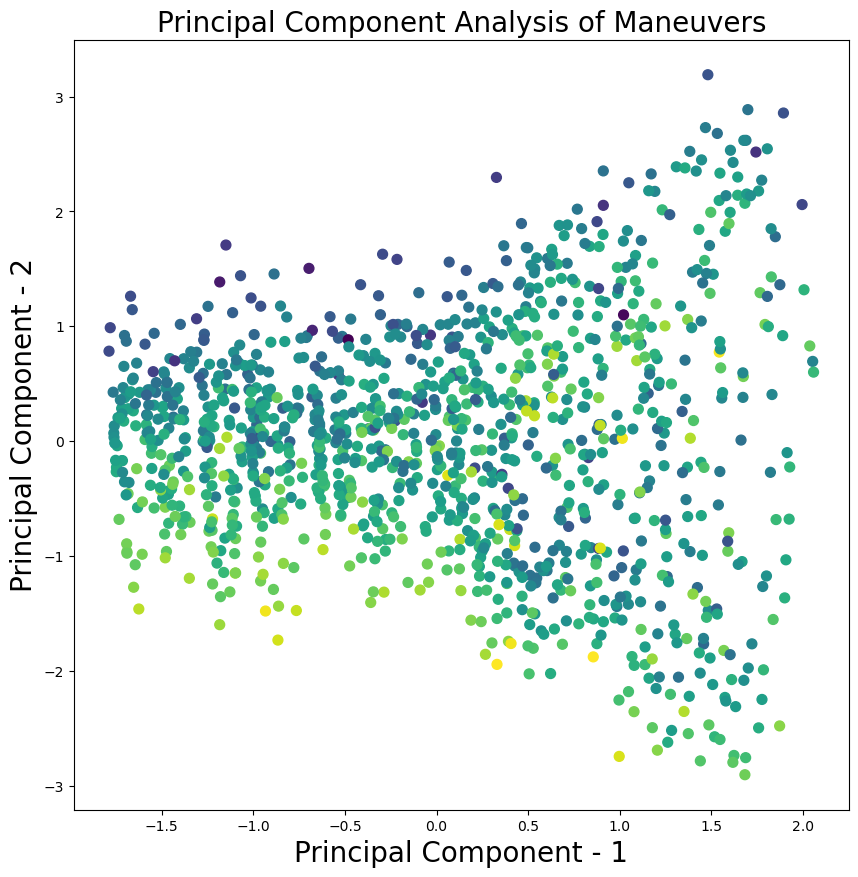

In [49]:
# Plot results of PCA
plt.figure()
plt.figure(figsize=(10,10))
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Maneuvers",fontsize=20)
plt.scatter(principalComponents_pred[:, 0], principalComponents_pred[:, 1], c=y_train_scaled, s = 50)

From the above picture, it is seems that (PC1, PC2) only do not allow to distinguish dv. 

In [50]:
import joblib
joblib.dump(scaler, 'scaler_supervised.gz')
joblib.dump(scaler_target, 'scaler_target_supervised.gz')

['scaler_target_supervised.gz']

# Select and Train a Model

## Training and Evaluating on the Training Set

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [52]:
# Let's measure this regression model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error
maneuvers_predictions = lin_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3.694768986772061e-05

In [53]:
# Let’s train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = tree_reg.predict(X_train_scaled)
tree_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

NOW THIS IS MUCH BETTER!!

In [54]:
#Let's try it out on 5 instances from the test set
some_data = X_test_scaled[10:20]
some_labels = y_test_scaled[10:20]
print("Predictions:", list(tree_reg.predict(some_data)))
print("Labels:", list(some_labels))

Predictions: [0.6040843030048133, 0.5166970419178467, 0.6042992663208562, 0.26202158979391565, 0.4419739240151409, 0.5325949810738819, 0.5293798775643722, 0.5544464694611898, 0.4735361465489042, 0.2938174681059863]
Labels: [array([0.60676667]), array([0.52916491]), array([0.61243983]), array([0.24385252]), array([0.42549652]), array([0.50423852]), array([0.52151035]), array([0.55687649]), array([0.48217206]), array([0.3163045])]


In [55]:
# Let’s train a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = forest_reg.predict(X_train_scaled)
forest_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.004390927044977861

## Polynomial Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
maneuvers_pred_poly = poly_features.fit_transform(X_train_scaled)
#print(X_train_scaled.head())
print(maneuvers_pred_poly[0])
#poly_features.get_feature_names_out(['x','y','z','dy'])

[0.7314682  0.81984647 0.45692927 0.86184379 0.51064653 0.53504573
 0.59969162 0.33422923 0.63041133 0.3735217  0.67214824 0.37461185
 0.70657959 0.41865176 0.20878435 0.39380165 0.23332934 0.74277473
 0.44009754 0.26075988]


In [57]:
my_lin_reg = LinearRegression()
my_lin_reg.fit(maneuvers_pred_poly, y_train_scaled)
print(my_lin_reg.coef_)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

[[ 7.36691488e+02 -1.53261557e+03 -7.56150068e+01  1.00490866e+03
   3.08583916e+01 -2.10327894e+03  8.75134508e+03  4.25637238e+02
  -5.73810214e+03 -1.73700978e+02 -9.10317241e+03 -8.85498020e+02
   1.19375784e+04  3.61368469e+02 -2.15338917e+01  5.80605392e+02
   1.75758364e+01 -3.91362953e+03 -2.36942912e+02 -3.58633952e+00]]


3.6812900253534215e-05

## SVM Regression

In [58]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2)
svm_poly_reg.fit(X_train_scaled, y_train_scaled)
maneuvers_predictions = svm_poly_reg.predict(X_train_scaled)
svm_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.06927649401291804

## Cross-validation

Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Random Forest model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [59]:
from sklearn.model_selection import cross_val_score
#tree_reg = DecisionTreeRegressor()
#forest_reg = RandomForestRegressor()
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, maneuvers_pred_poly, y_train_scaled,
scoring="neg_root_mean_squared_error", cv=5)
poly_rmse_scores = -scores

In [60]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(poly_rmse_scores)

Scores: [3.93817794e-05 3.51934620e-05 3.62513507e-05 3.86663366e-05
 3.78254408e-05]
Mean: 3.74636738922528e-05
Standard deviation: 1.5414273382226081e-06


## Evaluate Model on Test Set

In [61]:
maneuvers_pred_poly = poly_features.fit_transform(X_test_scaled)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_test_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3.854910148857493e-05

## Persist model

In [62]:
# Persist the model for future use (see correction_module.py) without having to retrain.
# Here you can replace pickle with joblib or cloudpickle
from pickle import dump
with open("model_supervised.pkl", "wb") as f:
    dump(my_lin_reg, f, protocol=5)